## Importando librerias

In [68]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Importando Datos

In [69]:
temperatura_df = pd.read_csv("celsius_a_fahrenheit.csv", sep=',')
temperatura_df.head(10)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


### Visualizacion

<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

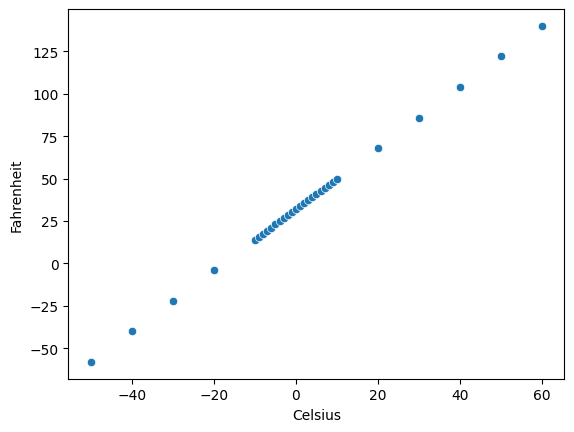

In [70]:
sns.scatterplot(
    x=temperatura_df['Celsius'],
    y=temperatura_df['Fahrenheit']
)

### Cargando set de Datos

In [71]:
X_train = temperatura_df['Celsius']
y_train = temperatura_df['Fahrenheit']

### Creando el modelo

In [72]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

c:\Users\Richard Rivera\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### Compilado

In [74]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.99), loss='mean_squared_error')

### Entrenando el modelo

In [75]:
epochs_hist = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step - loss: 1481.3315
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 954.6163
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1124.5621
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1096.7888
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 882.6356
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 730.0868
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 718.5939
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 749.3019
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 708.9297
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 602.4190
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 501.1125
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 455.3433
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 454.0303
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 446.6411
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 402.21

### Evaluando Modelo

In [76]:
epochs_hist.history.keys()

dict_keys(['loss'])

### Grafico

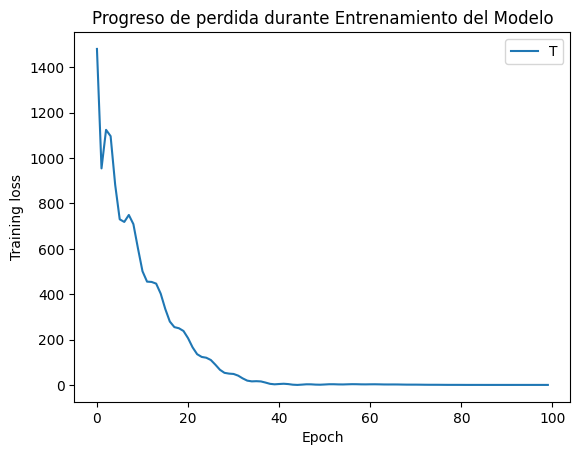

In [77]:
plt.plot(epochs_hist.history['loss'])
plt.title('Progreso de perdida durante Entrenamiento del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend('Training loos')

In [78]:
model.get_weights()

[array([[1.8049893]], dtype=float32), array([31.807812], dtype=float32)]

### Predicciones

In [79]:
Temp_C = np.array([0])

In [80]:
Temp_F = model.predict([Temp_C])
print(Temp_F)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
[[31.807812]]


In [81]:
Temp_F = 9/5 * Temp_C + 32
Temp_F

array([32.])